In [17]:
import pandas as pd
import altair as alt

In [3]:
df_raw = pd.read_excel('demand demo_2.xls')
df_raw.sample(10)

,product,quantity,region,plant,date
44831,prod_185,4592.422686,region_1,plant_2,2019-05-01T00:00:00.000Z
60103,prod_248,591.164161,region_0,plant_1,2020-03-01T00:00:00.000Z
64344,prod_266,12.721941,region_0,plant_0,2018-03-01T00:00:00.000Z
64333,prod_266,501.202866,region_0,plant_1,2020-02-01T00:00:00.000Z
43631,prod_180,9274.354929,region_1,plant_2,2019-09-01T00:00:00.000Z
2895,prod_11,4654.496217,region_1,plant_0,2020-01-01T00:00:00.000Z
17004,prod_74,62.187998,region_0,plant_0,2020-03-01T00:00:00.000Z
14346,prod_61,89.953528,region_0,plant_0,2019-03-01T00:00:00.000Z
3569,prod_14,12387.862811,region_1,plant_2,2020-01-01T00:00:00.000Z
5870,prod_24,37.003707,region_0,plant_2,2020-05-01T00:00:00.000Z


In [6]:
df_raw["date"].min()

'2018-01-01T00:00:00.000Z'

In [7]:
df_raw["date"].max()

'2021-08-01T00:00:00.000Z'

In [12]:
df_raw[["product"]].value_counts()

product 
prod_219    264
prod_186    264
prod_198    264
prod_197    264
prod_196    264
           ... 
prod_15      42
prod_43      42
prod_111     30
prod_246     24
prod_48      12
Length: 269, dtype: int64

In [16]:
df_raw.query("product == 'prod_185'")

,product,quantity,region,plant,date
44748,prod_185,38.545079,region_0,plant_0,2018-01-01T00:00:00.000Z
44749,prod_185,774.417001,region_0,plant_1,2018-01-01T00:00:00.000Z
44750,prod_185,198.688326,region_0,plant_2,2018-01-01T00:00:00.000Z
44751,prod_185,1191.436819,region_1,plant_0,2018-01-01T00:00:00.000Z
44752,prod_185,24649.154855,region_1,plant_1,2018-01-01T00:00:00.000Z
...,...,...,...,...,...
44941,prod_185,781.225137,region_0,plant_1,2019-12-01T00:00:00.000Z
44942,prod_185,223.791185,region_0,plant_2,2019-12-01T00:00:00.000Z
44943,prod_185,812.629321,region_1,plant_0,2019-12-01T00:00:00.000Z
44944,prod_185,19555.535260,region_1,plant_1,2019-12-01T00:00:00.000Z


In [51]:
alt.Chart(df_raw.query("product == 'prod_219'")).mark_line().encode(
    x=alt.X("date:T"),
    y=alt.Y("quantity:Q"),
    color=alt.Color("plant:N"),
    detail="region:N",
    tooltip = 
).properties(width=800).interactive()

alt.Chart(...)

In [27]:
from statsmodels.tsa.seasonal import STL, seasonal_decompose

In [30]:
df_decomp = df_raw.query(
    "product == 'prod_219' & region == 'region_0' & plant == 'plant_1'"
).set_index("date")["quantity"].sort_index()
df_decomp

date
2018-01-01T00:00:00.000Z    754.850483
2018-02-01T00:00:00.000Z    588.339553
2018-03-01T00:00:00.000Z    829.803804
2018-04-01T00:00:00.000Z    722.328559
2018-05-01T00:00:00.000Z    614.470143
2018-06-01T00:00:00.000Z    731.083782
2018-07-01T00:00:00.000Z    779.384928
2018-08-01T00:00:00.000Z    632.755237
2018-09-01T00:00:00.000Z    779.792041
2018-10-01T00:00:00.000Z    700.075131
2018-11-01T00:00:00.000Z    708.178398
2018-12-01T00:00:00.000Z    733.819213
2019-01-01T00:00:00.000Z    645.924260
2019-02-01T00:00:00.000Z    565.116194
2019-03-01T00:00:00.000Z    599.066993
2019-04-01T00:00:00.000Z    823.511237
2019-05-01T00:00:00.000Z    636.475068
2019-06-01T00:00:00.000Z    812.103513
2019-07-01T00:00:00.000Z    580.934030
2019-08-01T00:00:00.000Z    716.356808
2019-09-01T00:00:00.000Z    798.317512
2019-10-01T00:00:00.000Z    830.742551
2019-11-01T00:00:00.000Z    651.101900
2019-12-01T00:00:00.000Z    756.026141
2020-01-01T00:00:00.000Z    829.210146
2020-02-01T00:00:00.

In [35]:
df_decomp.index = pd.to_datetime(df_decomp.index)

In [48]:
decomp = seasonal_decompose(df_decomp)

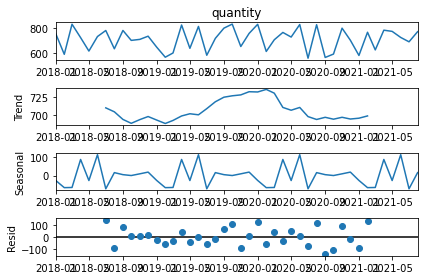

In [49]:
fig = decomp.plot();